# 1 - Importing the Libraries

In [4]:
import sys

In [5]:
print(sys.version)

3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

import pickle

import joblib

# 2 - Exploring Relationship between Predictive Features and Target Feature

## 2.1 - Loading in the Datasets

In [7]:
# loading the trips data
dftrips = pd.read_csv("rt_trips_DB_2018-cleaned.csv", parse_dates=[0], infer_datetime_format=True)

In [8]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0
1,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0
2,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0
3,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0
4,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0


In [9]:
# loading the route 1 data
dfroute1 = pd.read_csv("route_1_leavetimes-cleaned.csv", parse_dates=[0], infer_datetime_format=True)

In [10]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209


In [11]:
# loading in the weather datasets
dfw = pd.read_csv("2018_historic_weather_3-cleaned.csv", parse_dates=[1], infer_datetime_format=True)

In [12]:
dfw.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,4.15,-6.49,3.84,5.79,990,87,12.86,240,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,4.14,-5.79,3.65,5.86,991,87,11.83,240,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,4.61,-5.77,3.85,5.99,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,4.64,-5.73,4.00,6.14,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,5.04,-4.91,4.11,6.22,990,81,11.83,240,40,802,Clouds,scattered clouds,03n


In [13]:
# loading in the south Dublin traffic data
dftraffic = pd.read_csv("ExtraDatasets/SDCC_Traffic_Congestion_Saturation_Flow_Data_2018.csv", parse_dates=[2, 3], infer_datetime_format=True)

In [14]:
dftraffic.head()

,site,day,date,start_time,end_time,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,MO,2018-01-01,2020-10-30 00:00:00,00:15,16,100,0,100,2,21,1
1,N01111A,MO,2018-01-01,2020-10-30 00:15:00,00:30,75,100,0,100,5,20,2
2,N01111A,MO,2018-01-01,2020-10-30 00:30:00,00:45,103,100,0,100,4,75,3
3,N01111A,MO,2018-01-01,2020-10-30 00:45:00,01:00,78,100,0,100,4,65,4
4,N01111A,MO,2018-01-01,2020-10-30 01:00:00,01:15,111,100,0,100,4,23,5


In [15]:
# loading in the stops data
dfs = pd.read_csv("stops-cleaned.csv")

In [16]:
dfs.head()

,stop_id,stop_name,stop_lat,stop_lon,stop_number
0,8220DB000002,"Parnell Square West, stop 2",53.352244,-6.263723,2.0
1,8220DB000003,"Parnell Square West, stop 3",53.352309,-6.263811,3.0
2,8220DB000004,"Parnell Square West, stop 4",53.352575,-6.264175,4.0
3,8220DB000006,"Parnell Square West, stop 6",53.352749,-6.264454,6.0
4,8220DB000007,"Parnell Square West, stop 7",53.352841,-6.264570,7.0


## 2.2 - Adding Useful Columns to Current Dataframes

In [17]:
# adding TRAVELTIME column to the trips dataframe
dftrips['TRAVELTIME'] = dftrips['ACTUALTIME_ARR'] - dftrips['ACTUALTIME_DEP']
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TRAVELTIME
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0
1,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,4247.0
2,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,4020.0
3,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3074.0
4,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,4481.0


In [18]:
# adding STOPTIME column to the route1 dataframe
dfroute1['STOPTIME'] = dfroute1['ACTUALTIME_DEP'] - dfroute1['ACTUALTIME_ARR']
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,STOPTIME
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,0
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,0
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,0
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,0
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,14


In [19]:
# adding TRIPSTART to route 1 dataframe which is the departure time for the entire trip
dfroute1new = dfroute1.merge(dftrips, on = ['DAYOFSERVICE', 'TRIPID'])

In [20]:
dfroute1new.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR_x,PLANNEDTIME_DEP_x,ACTUALTIME_ARR_x,ACTUALTIME_DEP_x,VEHICLEID,STOPTIME,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR_y,PLANNEDTIME_DEP_y,ACTUALTIME_ARR_y,ACTUALTIME_DEP_y,TRAVELTIME
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,0,1,1_37,1,50199,47400,49653.0,47427.0,2226.0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,0,1,1_37,1,50199,47400,49653.0,47427.0,2226.0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,0,1,1_37,1,50199,47400,49653.0,47427.0,2226.0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,11,1,1_37,1,50199,47400,49653.0,47427.0,2226.0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,0,1,1_37,1,50199,47400,49653.0,47427.0,2226.0


In [21]:
# keeping only the columns we want for dfroute1
dfroute1 = dfroute1new[['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 'PLANNEDTIME_ARR_x', 'PLANNEDTIME_DEP_x', 'ACTUALTIME_ARR_x', 'ACTUALTIME_DEP_x', 'VEHICLEID', 'DIRECTION', 'STOPTIME', 'ACTUALTIME_DEP_y']]

In [22]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR_x,PLANNEDTIME_DEP_x,ACTUALTIME_ARR_x,ACTUALTIME_DEP_x,VEHICLEID,DIRECTION,STOPTIME,ACTUALTIME_DEP_y
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,0,47427.0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,0,47427.0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,0,47427.0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,11,47427.0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,0,47427.0


In [23]:
# renaming the new columns
dfroute1 = dfroute1.rename(columns={'PLANNEDTIME_ARR_x':'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP_x':'PLANNEDTIME_DEP', 'ACTUALTIME_ARR_x':'ACTUALTIME_ARR', 'ACTUALTIME_DEP_x':'ACTUALTIME_DEP', 'ACTUALTIME_DEP_y':'TRIPSTART'})
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,STOPTIME,TRIPSTART
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,0,47427.0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,0,47427.0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,0,47427.0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,11,47427.0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,0,47427.0


In [24]:
# adding a column for time since start of the trip, or TRAVELTIME, calculated as ACTUALTIME_ARR - TRIPSTART
dfroute1['TRAVELTIME'] = dfroute1['ACTUALTIME_ARR'] - dfroute1['TRIPSTART']
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,STOPTIME,TRIPSTART,TRAVELTIME
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,0,47427.0,585.0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,0,47427.0,631.0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,0,47427.0,644.0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,11,47427.0,662.0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,0,47427.0,710.0


In [25]:
# adding month of year column for trips dataframe
dftrips['MONTHOFYEAR'] = dftrips['DAYOFSERVICE'].dt.month

In [26]:
# adding month of year column for route 1 dataframe
dfroute1['MONTHOFYEAR'] = dfroute1['DAYOFSERVICE'].dt.month

In [27]:
# adding day column for trips dataframe
dftrips['DAYOFWEEK'] = dftrips['DAYOFSERVICE'].dt.dayofweek

In [28]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TRAVELTIME,MONTHOFYEAR,DAYOFWEEK
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2
1,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,4247.0,2,2
2,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,4020.0,2,2
3,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3074.0,2,2
4,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,4481.0,2,2


In [29]:
# adding day column for route1 dataframe
dfroute1['DAYOFWEEK'] = dfroute1['DAYOFSERVICE'].dt.dayofweek

In [30]:
# adding hour column for trips dataframe
dftrips['HOUROFDAY'] = (dftrips['ACTUALTIME_ARR'] // 3600).astype(int)

In [31]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TRAVELTIME,MONTHOFYEAR,DAYOFWEEK,HOUROFDAY
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2,24
1,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,4247.0,2,2,10
2,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,4020.0,2,2,16
3,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3074.0,2,2,23
4,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,4481.0,2,2,11


In [32]:
# adding hour column for route1 dataframe
dfroute1['HOUROFDAY'] = (dfroute1['ACTUALTIME_DEP'] // 3600).astype(int)

In [33]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,STOPTIME,TRIPSTART,TRAVELTIME,MONTHOFYEAR,DAYOFWEEK,HOUROFDAY
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,0,47427.0,585.0,1,0,13
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,0,47427.0,631.0,1,0,13
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,0,47427.0,644.0,1,0,13
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,11,47427.0,662.0,1,0,13
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,0,47427.0,710.0,1,0,13


In [34]:
dfw.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,4.15,-6.49,3.84,5.79,990,87,12.86,240,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,4.14,-5.79,3.65,5.86,991,87,11.83,240,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,4.61,-5.77,3.85,5.99,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,4.64,-5.73,4.00,6.14,990,81,12.35,240,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,5.04,-4.91,4.11,6.22,990,81,11.83,240,40,802,Clouds,scattered clouds,03n


In [35]:
# getting dummy columns for weather_main
weather_main_dummies = pd.get_dummies(dfw['weather_main'], prefix='w_main', drop_first=True)
print(weather_main_dummies)

      w_main_Clouds  w_main_Drizzle  w_main_Fog  w_main_Mist  w_main_Rain  \
0                 0               0           0            0            1   
1                 0               0           0            0            1   
2                 1               0           0            0            0   
3                 1               0           0            0            0   
4                 1               0           0            0            0   
...             ...             ...         ...          ...          ...   
8795              1               0           0            0            0   
8796              1               0           0            0            0   
8797              1               0           0            0            0   
8798              1               0           0            0            0   
8799              1               0           0            0            0   

      w_main_Smoke  w_main_Snow  
0                0            0  
1      

In [36]:
# adding dummies to weather main dataframe
dfw = pd.concat([dfw, weather_main_dummies], axis=1)

In [37]:
string = "2018-01-01 00:00:00 +0000 UTC"
new_string = string[:-10]
print(new_string)

2018-01-01 00:00:00


In [38]:
dfw['dt_iso'].str.slice(start=0, stop=-10).head(10)

0    2018-01-01 00:00:00
1    2018-01-01 01:00:00
2    2018-01-01 02:00:00
3    2018-01-01 03:00:00
4    2018-01-01 04:00:00
5    2018-01-01 05:00:00
6    2018-01-01 06:00:00
7    2018-01-01 07:00:00
8    2018-01-01 08:00:00
9    2018-01-01 09:00:00
Name: dt_iso, dtype: object

In [39]:
# adding date column to weather dataframe (UTC truncated)
dfw['date'] = dfw['dt_iso'].str.slice(start=0, stop=-10)

In [40]:
# converting DAYOFSERVICE column to datetime
dfw['date'] = dfw['date'].astype('datetime64')

In [41]:
# adding HOUROFDAY column to weather dataframe
dfw['HOUROFDAY'] = dfw['date'].dt.hour

In [42]:
# adding 24 to hour column if it is 0, 1 or 2
dfw['HOUROFDAY'].loc[dfw['HOUROFDAY'] < 4] += 24

/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
dfw['HOUROFDAY'].value_counts()

9     369
27    369
23    368
4     368
22    367
21    367
25    367
11    367
10    367
24    367
7     367
6     367
5     367
12    367
8     366
13    366
16    366
17    366
19    366
26    366
14    365
15    365
18    365
20    365
Name: HOUROFDAY, dtype: int64

In [44]:
# removing the hour from the date column and renaming it for the merge
dfw['DAYOFSERVICE'] = dfw['date'].dt.date

In [45]:
# converting route1 DAYOFSERVICE to datetime
dfroute1['DAYOFSERVICE'] = dfroute1['DAYOFSERVICE'].astype('datetime64')

In [46]:
# converting DAYOFSERVICE column to datetime
dfw['DAYOFSERVICE'] = dfw['DAYOFSERVICE'].astype('datetime64')

In [47]:
dfw.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,date,HOUROFDAY,DAYOFSERVICE
0,1514764800,2018-01-01 00:00:00 +0000 UTC,4.15,-6.49,3.84,5.79,990,87,12.86,240,...,0,0,0,0,1,0,0,2018-01-01 00:00:00,24,2018-01-01
1,1514768400,2018-01-01 01:00:00 +0000 UTC,4.14,-5.79,3.65,5.86,991,87,11.83,240,...,0,0,0,0,1,0,0,2018-01-01 01:00:00,25,2018-01-01
2,1514772000,2018-01-01 02:00:00 +0000 UTC,4.61,-5.77,3.85,5.99,990,81,12.35,240,...,1,0,0,0,0,0,0,2018-01-01 02:00:00,26,2018-01-01
3,1514775600,2018-01-01 03:00:00 +0000 UTC,4.64,-5.73,4.00,6.14,990,81,12.35,240,...,1,0,0,0,0,0,0,2018-01-01 03:00:00,27,2018-01-01
4,1514779200,2018-01-01 04:00:00 +0000 UTC,5.04,-4.91,4.11,6.22,990,81,11.83,240,...,1,0,0,0,0,0,0,2018-01-01 04:00:00,4,2018-01-01


In [48]:
# merging route 1 data with weather data (merge on date and hour, keep temp, wind_speed and w_main dummies)
dfroute1 = dfroute1.merge(dfw[['temp', 'wind_speed', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'DAYOFSERVICE', 'HOUROFDAY']], on=['DAYOFSERVICE', 'HOUROFDAY'])

In [49]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,HOUROFDAY,temp,wind_speed,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0


## 2.3 - Visualising Target Feature and Predictive Features

### 2.3.1 - Visualising Trips Travel Time

<AxesSubplot:>

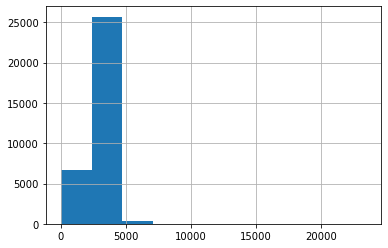

In [50]:
dftrips['TRAVELTIME'].loc[dftrips['LINEID'] == '1'].hist()

<AxesSubplot:>

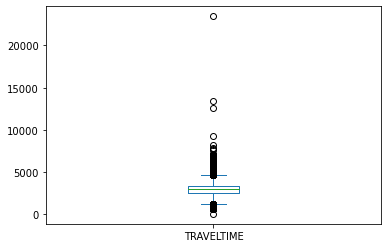

In [51]:
dftrips['TRAVELTIME'].loc[dftrips['LINEID'] == '1'].plot(kind='box')

In [52]:
dftrips['TRAVELTIME'].loc[(dftrips['LINEID'] == '1') & (dftrips['TRAVELTIME'] < dftrips['TRAVELTIME'].mean() * 0.3)]

1147       1140.0
2680        900.0
2892        721.0
6533        901.0
7047        766.0
            ...  
1875766     745.0
1881809     878.0
1887225     903.0
1889113    1090.0
1891697    1145.0
Name: TRAVELTIME, Length: 717, dtype: float64

In [53]:
dftrips['TRAVELTIME'].loc[(dftrips['LINEID'] == '1') & (dftrips['TRAVELTIME'] > dftrips['TRAVELTIME'].mean() * 5)]

1379603    23458.0
Name: TRAVELTIME, dtype: float64

I think it is worth removing outliers for entire trips dataframe based on the threshold of below 30% of the mean and above 500% of the mean.

In [54]:
# dropping the outliers from the trips dataframe based on the above information
# need to loop over each LINEID
for lineid in dftrips['LINEID'].unique():
    dftrips = dftrips.drop(dftrips[(dftrips['LINEID'] == lineid) & ((dftrips['TRAVELTIME'] > dftrips['TRAVELTIME'].mean() * 5) | (dftrips['TRAVELTIME'] < dftrips['TRAVELTIME'].mean() * 0.3))].index)

<AxesSubplot:>

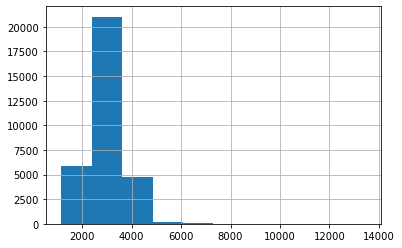

In [55]:
dftrips['TRAVELTIME'].loc[dftrips['LINEID'] == '1'].hist()

### 2.3.2 - Visualising Route 1 Leave Times Stop Time

In [56]:
dfroute1['STOPTIME'].value_counts()

0      487593
12      47955
13      46807
11      45244
14      43970
        ...  
828         1
833         1
460         1
606         1
686         1
Name: STOPTIME, Length: 838, dtype: int64

In [57]:
dfroute1.shape

(1294978, 25)

### 2.3.3 - Visualising Route 1 Leave Times Travel Time

<AxesSubplot:>

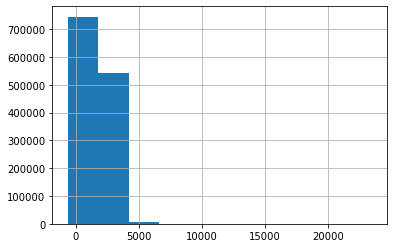

In [58]:
dfroute1['TRAVELTIME'].hist()

<AxesSubplot:>

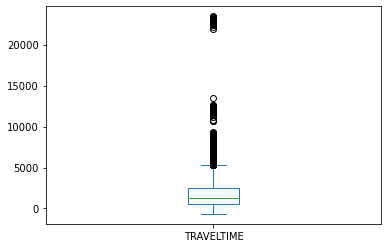

In [59]:
dfroute1['TRAVELTIME'].plot(kind='box')

In [60]:
dfroute1['TRAVELTIME'].mean()

1513.7175867080368

In [61]:
dfroute1['TRAVELTIME'].loc[dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean() * 10]

657422    22133.0
657423    22367.0
657424    22372.0
657425    22444.0
657426    22465.0
657427    22543.0
657428    22603.0
657429    22670.0
657430    22785.0
657431    22900.0
657432    22956.0
657433    23005.0
657434    23027.0
657435    23116.0
657436    23180.0
657437    23235.0
657438    23276.0
657439    23330.0
657440    23377.0
657441    23403.0
657442    23458.0
657443    22835.0
657444    21936.0
657445    22700.0
Name: TRAVELTIME, dtype: float64

In [62]:
dfroute1.shape

(1294978, 25)

In [63]:
# dropping travel times which are more than 10 times the average travel time for route 1 trips
dfroute1 = dfroute1.drop(dfroute1[dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean() * 10].index)

In [64]:
dfroute1.shape

(1294954, 25)

<AxesSubplot:>

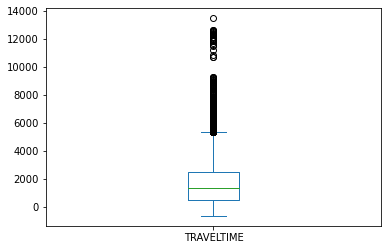

In [65]:
dfroute1['TRAVELTIME'].plot(kind='box')

## 2.4 - Exploring Predictive Features

<AxesSubplot:xlabel='PROGRNUMBER', ylabel='TRAVELTIME'>

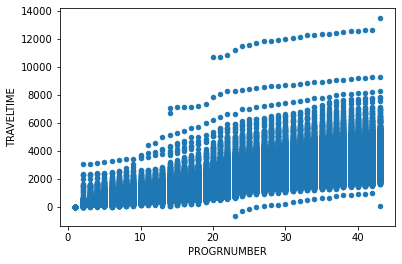

In [66]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
dfroute1[['PROGRNUMBER', 'TRAVELTIME']].plot(kind='scatter', x='PROGRNUMBER', y='TRAVELTIME')

The above plot shows how the progress number has a clear impact on the travel time for each step of each trip.

<ipython-input-67-9b64fcdddab9>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dftrips['DAYOFSERVICE'] = dftrips['DAYOFSERVICE'].astype('int64')


<AxesSubplot:xlabel='DAYOFSERVICE', ylabel='TRAVELTIME'>

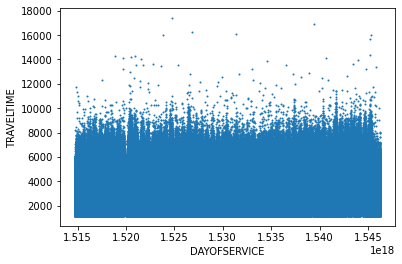

In [67]:
# plotting DAYOFSERVICE vs TRAVELTIME for trips
dftrips['DAYOFSERVICE'] = dftrips['DAYOFSERVICE'].astype('int64')
dftrips[['DAYOFSERVICE', 'TRAVELTIME']].plot(kind='scatter', x='DAYOFSERVICE', y='TRAVELTIME', s=1)

In [68]:
dftrips['DAYOFSERVICE'] = dftrips['DAYOFSERVICE'].astype('datetime64[ns]')

In [69]:
# printing average travel time for each day for trips
for i in range(7):
    print(dftrips['TRAVELTIME'].loc[dftrips['DAYOFWEEK'] == i].mean())

3845.264024821957
3971.365633477558
4008.2671428857275
4040.8353596637457
4034.669695662365
3602.051169935154
3463.6907238511594


We can see from the above result that the day of the week has an impact on the travel time for the trips. This will therefore constitute an important predictive factor.

In [70]:
# printing average travel time for each hour for trips
for hour in range(27):
    print("Hour:", hour, "Mean travel time:", dftrips['TRAVELTIME'].loc[dftrips['HOUROFDAY'] == hour].mean())

Hour: 0 Mean travel time: nan
Hour: 1 Mean travel time: nan
Hour: 2 Mean travel time: nan
Hour: 3 Mean travel time: nan
Hour: 4 Mean travel time: 1513.125
Hour: 5 Mean travel time: 2229.626245847176
Hour: 6 Mean travel time: 2775.06897007333
Hour: 7 Mean travel time: 3183.5531250823083
Hour: 8 Mean travel time: 3791.2738891270833
Hour: 9 Mean travel time: 4271.80875589451
Hour: 10 Mean travel time: 3976.6420875589083
Hour: 11 Mean travel time: 3828.488940946252
Hour: 12 Mean travel time: 3899.572964498743
Hour: 13 Mean travel time: 4006.5217204301075
Hour: 14 Mean travel time: 4062.9893708151953
Hour: 15 Mean travel time: 4125.26744080641
Hour: 16 Mean travel time: 4143.005070300982
Hour: 17 Mean travel time: 4308.484890223867
Hour: 18 Mean travel time: 4385.500349766469
Hour: 19 Mean travel time: 4155.9436259018785
Hour: 20 Mean travel time: 3724.3805985812032
Hour: 21 Mean travel time: 3436.6284870637824
Hour: 22 Mean travel time: 3203.6331045003813
Hour: 23 Mean travel time: 2829.45

The above results indicate a strong relationship between the hour of the day and the travel time, with longer trips around the peak times of 8/9am and 5/6pm.

In [71]:
# printing average travel time for each month for trips
for month in range(1, 13):
    print("Month:", month, dftrips['TRAVELTIME'].loc[dftrips['MONTHOFYEAR'] == month].mean())

Month: 1 3807.985753752757
Month: 2 3890.755246525072
Month: 3 3905.9075967583126
Month: 4 3881.938189203039
Month: 5 3922.649172805217
Month: 6 3826.9738919979927
Month: 7 3781.033601110415
Month: 8 3777.938548071118
Month: 9 3890.8973885042665
Month: 10 3979.874382462885
Month: 11 4071.1315448502833
Month: 12 3975.95940984863


The above results indicate that the month has a small impact on the travel time of trips over the year.

In [72]:
# comparing travel time when direction is 1 vs when direction is 2
for i in range(1, 3):
    print("Direction:", i, "Travel time:", dfroute1['TRAVELTIME'].loc[dfroute1['DIRECTION'] == i].mean())

Direction: 1 Travel time: 1443.3685315175296
Direction: 2 Travel time: 1579.1839813729223


We can see a clear difference between the average travel time when the direction is 1 vs when it is 2. Therefore, it will make a good predictive feature for our model.

# 3 - Linear Models

## 3.1 - Linear Model for Route 1 Data using Progress Number, Direction, Hour, Day and Month 

In [73]:
# 70/30 train/test split for route 1 data
trainroute1 = dfroute1.sample(frac=0.7, random_state=1)
testroute1 = dfroute1.drop(trainroute1.index)

In [74]:
trainroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,HOUROFDAY,temp,wind_speed,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow
456869,2018-05-31,6847425,15,396,46481,46481,46509,46528,2534840,2,...,12,19.85,6.17,1,0,0,0,0,0,0
911249,2018-09-18,8092424,33,203,84920,84920,85160,85174,2172251,2,...,23,14.00,7.72,1,0,0,0,0,0,0
808902,2018-08-09,7320032,16,397,53668,53668,53679,53692,2534838,2,...,14,17.31,4.12,1,0,0,0,0,0,0
203119,2018-02-26,6294977,34,372,50512,50512,50154,50169,2693266,1,...,13,1.94,8.23,1,0,0,0,0,0,0
382704,2018-04-20,6633737,25,14,39137,39137,39366,39366,2534840,2,...,10,12.70,5.14,1,0,0,0,0,0,0


In [75]:
# the descriptive features for this model
r1features = ['PROGRNUMBER', 'DIRECTION', 'HOUROFDAY', 'DAYOFWEEK', 'MONTHOFYEAR']

X = trainroute1[r1features]
y = trainroute1['TRAVELTIME']

In [76]:
# fitting the model
linregr1 = LinearRegression().fit(X, y)

In [77]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linregr1.intercept_)
print("Features and coeficients:", list(zip(r1features, linregr1.coef_)))

Intercept:  -138.99189897740303
Features and coeficients: [('PROGRNUMBER', 85.33675745368105), ('DIRECTION', 76.01041673357813), ('HOUROFDAY', -16.902809799406178), ('DAYOFWEEK', -12.187930034871925), ('MONTHOFYEAR', 4.004109810250798)]


In [78]:
# predicting the travel time for the first 20 rows of the training dataframe
linregr1_predictions = linregr1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linregr1 = pd.concat([y.head(20), pd.DataFrame(linregr1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linregr1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
456869        817.0  1073.703338
911249       2149.0  2464.226363
808902        883.0  1137.246805
203119       2166.0  2626.739963
382704       2144.0  1944.684492
1281194      1810.0  2329.036158
144258       1668.0  1585.899483
1072832       191.0    50.030337
991285        139.0   231.957135
543174       2432.0  2116.715885
895489         63.0   -65.755038
488077       1102.0  1160.893386
235929       1577.0  1491.452778
959439        516.0   577.811171
964122       3369.0  2350.118678
501294       2957.0  2780.335068
837476        800.0  1134.497154
611430       2243.0  2035.383237
39504         635.0   754.860368
378116       2717.0  2179.077075


In [79]:
# predicting the travel time for entire test dataframe
linregr1_test_predictions = linregr1.predict(testroute1[r1features])

In [80]:
# difference between test travel times and test predictions
r1prediction_diffs = testroute1['TRAVELTIME'] - linregr1_test_predictions

In [81]:
# calculating root mean square error
r1_linmodel_rmse = ((r1prediction_diffs**2).mean())**0.5
print("RMSE:", r1_linmodel_rmse)

RMSE: 392.2088347624452


We can see that on average we are off by 6 and a half minutes. This result is quite poor when we consider the fact that the average travel time in this dataset is 25 minutes.

In [82]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linregr1_test_predictions))

R2 score: 0.8751041148749964


The R2 score for this model looks pretty good, however, I think higher scores can certainly be achieved.

## 3.2 - Linear Model for Route 1 Data using the Weather Data also

In [83]:
# the descriptive features for this model
r1features2 = ['PROGRNUMBER', 'DIRECTION', 'HOUROFDAY', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'wind_speed', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow']

X = trainroute1[r1features2]
y = trainroute1['TRAVELTIME']

In [84]:
# fitting the model
linreg2r1 = LinearRegression().fit(X, y)

In [85]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg2r1.intercept_)
print("Features and coeficients:", list(zip(r1features2, linreg2r1.coef_)))

Intercept:  -263.16490922448156
Features and coeficients: [('PROGRNUMBER', 85.27653048809785), ('DIRECTION', 76.50276828555971), ('HOUROFDAY', -16.41143736002084), ('DAYOFWEEK', -12.131796383475), ('MONTHOFYEAR', 3.935004470453512), ('temp', 2.8879712451771997), ('wind_speed', 6.788323733535796), ('w_main_Clouds', 47.899939304471836), ('w_main_Drizzle', 35.907014708082905), ('w_main_Fog', 78.12990287806873), ('w_main_Mist', 113.06833828525653), ('w_main_Rain', 76.6412667774563), ('w_main_Smoke', 0.6679839536023532), ('w_main_Snow', -32.317509753149906)]


In [86]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg2r1_predictions = linreg2r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg2r1 = pd.concat([y.head(20), pd.DataFrame(linreg2r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg2r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
456869        817.0  1102.441096
911249       2149.0  2490.523714
808902        883.0  1145.448254
203119       2166.0  2616.631727
382704       2144.0  1944.321506
1281194      1810.0  2320.381744
144258       1668.0  1557.530945
1072832       191.0    50.283508
991285        139.0   219.924679
543174       2432.0  2130.334924
895489         63.0   -61.719352
488077       1102.0  1145.695975
235929       1577.0  1458.454022
959439        516.0   554.121743
964122       3369.0  2325.679246
501294       2957.0  2790.277681
837476        800.0  1131.933136
611430       2243.0  2069.869472
39504         635.0   749.488885
378116       2717.0  2208.435620


In [87]:
# predicting the travel time for entire test dataframe
linreg2r1_test_predictions = linreg2r1.predict(testroute1[r1features2])

In [88]:
# difference between test travel times and test predictions
r1prediction_diffs2 = testroute1['TRAVELTIME'] - linreg2r1_test_predictions

In [89]:
# calculating root mean square error
r1_linmodel2_rmse = ((r1prediction_diffs2**2).mean())**0.5
print("RMSE:", r1_linmodel2_rmse)

RMSE: 391.354012080429


In [90]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg2r1_test_predictions))

R2 score: 0.8756479449964676


## 3.3 - Creating Dummies for Hour of Day and using them instead

In [91]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,HOUROFDAY,temp,wind_speed,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0


In [92]:
# getting dummies for HOUROFDAY
hour_dummies = pd.get_dummies(dfroute1['HOUROFDAY'], prefix='h', drop_first=True)
print(hour_dummies)

         h_7  h_8  h_9  h_10  h_11  h_12  h_13  h_14  h_15  h_16  h_17  h_18  \
0          0    0    0     0     0     0     1     0     0     0     0     0   
1          0    0    0     0     0     0     1     0     0     0     0     0   
2          0    0    0     0     0     0     1     0     0     0     0     0   
3          0    0    0     0     0     0     1     0     0     0     0     0   
4          0    0    0     0     0     0     1     0     0     0     0     0   
...      ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1294973    1    0    0     0     0     0     0     0     0     0     0     0   
1294974    1    0    0     0     0     0     0     0     0     0     0     0   
1294975    1    0    0     0     0     0     0     0     0     0     0     0   
1294976    1    0    0     0     0     0     0     0     0     0     0     0   
1294977    1    0    0     0     0     0     0     0     0     0     0     0   

         h_19  h_20  h_21  h_22  h_23  

In [93]:
# adding dummies to route 1 dataframe
dfroute1 = pd.concat([dfroute1, hour_dummies], axis=1)

In [94]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# 70/30 train/test split for route 1 data
trainroute1 = dfroute1.sample(frac=0.7, random_state=1)
testroute1 = dfroute1.drop(trainroute1.index)

In [96]:
# the descriptive features for this model
r1features3 = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23', 'h_24']

X = trainroute1[r1features3]
y = trainroute1['TRAVELTIME']

In [97]:
# fitting the model
linreg3r1 = LinearRegression().fit(X, y)

In [98]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg3r1.intercept_)
print("Features and coeficients:", list(zip(r1features3, linreg3r1.coef_)))

Intercept:  -481.4102587327252
Features and coeficients: [('PROGRNUMBER', 84.48307054105268), ('DIRECTION', 80.23496240631516), ('DAYOFWEEK', -14.748811747035766), ('MONTHOFYEAR', 4.75280608809436), ('h_7', 31.752351062029504), ('h_8', 204.5268937412737), ('h_9', 286.4886414855074), ('h_10', 122.88095189456546), ('h_11', 106.9158527793839), ('h_12', 128.0151763227275), ('h_13', 151.2825267553857), ('h_14', 139.102504417966), ('h_15', 166.90727121786568), ('h_16', 201.46805980895266), ('h_17', 276.1514282149543), ('h_18', 316.15538537837944), ('h_19', 145.64710899535623), ('h_20', -33.80674523021234), ('h_21', -186.01436188433385), ('h_22', -294.52721763542496), ('h_23', -204.8684942937776), ('h_24', 712.6579646417637)]


In [99]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg3r1_predictions = linreg3r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg3r1 = pd.concat([y.head(20), pd.DataFrame(linreg3r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg3r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
456869        817.0  1053.838496
911249       2149.0  2290.158943
808902        883.0  1163.667313
203119       2166.0  2632.037241
382704       2144.0  1874.033359
1281194      1810.0  2266.514642
144258       1668.0  1561.227312
1072832       191.0   174.921597
991285        139.0   229.048576
543174       2432.0  2123.712112
895489         63.0    67.019606
488077       1102.0  1091.972727
235929       1577.0  1574.484362
959439        516.0   858.076194
964122       3369.0  2451.211696
501294       2957.0  2788.332966
837476        800.0  1084.242048
611430       2243.0  2043.981847
39504         635.0   840.619643
378116       2717.0  2147.365607


In [100]:
# predicting the travel time for entire test dataframe
linreg3r1_test_predictions = linreg3r1.predict(testroute1[r1features3])

In [101]:
# difference between test travel times and test predictions
r1prediction_diffs3 = testroute1['TRAVELTIME'] - linreg3r1_test_predictions

In [102]:
# calculating root mean square error
r1_linmodel3_rmse = ((r1prediction_diffs3**2).mean())**0.5
print("RMSE:", r1_linmodel3_rmse)

RMSE: 365.99591879901936


In [103]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg3r1_test_predictions))

R2 score: 0.8912408334081313


We have a 30 second improvement from using these dummy variables for the hour.

In [104]:
for condition in np.delete(dfw['weather_main'].unique(), 3):
    print(dfroute1['TRAVELTIME'].loc[dfroute1['w_main_{}'.format(condition)] == 1].mean())

1564.6846202648762
1511.5374300792946
1479.4790292416312
1457.1365873121426
1467.3883099229724
1377.102354933046
1488.3893805309735


We can see the effect that the weather condition has on the travel times above.

<AxesSubplot:>

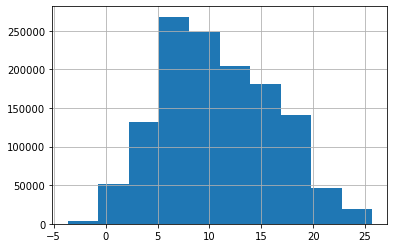

In [105]:
dfroute1['temp'].hist()

In [106]:
for i in range(-5, 28, 2):
    print(dfroute1['TRAVELTIME'].loc[(dfroute1['temp'] > i) & (dfroute1['temp'] < i+2)].mean())

662.4870689655172
1132.5035587188613
1284.8890583999512
1358.8275577982597
1488.7693145789526
1531.8056746036618
1549.0380858825395
1520.3456836806438
1492.4901508713763
1476.988988721086
1523.0199810184524
1555.0161773207797
1576.1618067264176
1625.3144757570453
1616.5127464309994
1549.8966267682263
nan


We can also see that temperature has an effect on the travel time, where colder temperatures seem to correlate with lower travel times.

<AxesSubplot:>

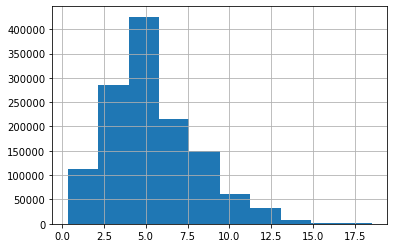

In [107]:
dfroute1['wind_speed'].hist()

In [108]:
for i in range(0, 21, 2):
    print(dfroute1['TRAVELTIME'].loc[(dfroute1['wind_speed'] > i) & (dfroute1['wind_speed'] < i+2)].mean())

1393.3423306790573
1466.9334770602484
1531.8551430868395
1553.3904757046496
1546.5560622978871
1507.6970341293206
1563.0552311819472
1372.9494609164421
1321.3322091062394
1293.6323232323232
nan


There appears to be a nonlinear relationship between the wind speed and the travel time.

In [109]:
# descriptive features (same model as last time except we include temp and weather condition)
r1features4 = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23', 'h_24']

X = trainroute1[r1features4]
y = trainroute1['TRAVELTIME']

In [110]:
# fitting the model
linreg4r1 = LinearRegression().fit(X, y)

In [111]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg4r1.intercept_)
print("Features and coeficients:", list(zip(r1features4, linreg4r1.coef_)))

Intercept:  -465.6750949537734
Features and coeficients: [('PROGRNUMBER', 84.4654750215961), ('DIRECTION', 80.26737800719923), ('DAYOFWEEK', -14.574141213288001), ('MONTHOFYEAR', 5.252026992352576), ('temp', -2.0501244258750617), ('w_main_Clouds', -7.0007323995521515), ('w_main_Drizzle', -16.729007417466043), ('w_main_Fog', -32.23752793611141), ('w_main_Mist', 94.10367865417274), ('w_main_Rain', 17.346166315420042), ('w_main_Smoke', -28.98091530550773), ('w_main_Snow', -112.1107437380235), ('h_7', 33.15372678881498), ('h_8', 209.16547557575944), ('h_9', 292.7293078143686), ('h_10', 130.35667179815653), ('h_11', 115.12816220760497), ('h_12', 138.6324890816003), ('h_13', 162.12035310882146), ('h_14', 149.9633186696209), ('h_15', 177.40543449827794), ('h_16', 211.00399692160835), ('h_17', 286.4029656664623), ('h_18', 325.25093311584436), ('h_19', 153.09402097873553), ('h_20', -28.822950874372726), ('h_21', -181.32311667761053), ('h_22', -290.43575352496265), ('h_23', -200.02426201671867),

In [112]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg4r1_predictions = linreg4r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg4r1 = pd.concat([y.head(20), pd.DataFrame(linreg4r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg4r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
456869        817.0  1035.316285
911249       2149.0  2279.187702
808902        883.0  1152.075986
203119       2166.0  2648.064867
382704       2144.0  1866.527439
1281194      1810.0  2263.676181
144258       1668.0  1576.353345
1072832       191.0   203.758147
991285        139.0   229.410627
543174       2432.0  2107.293957
895489         63.0    58.396508
488077       1102.0  1086.969697
235929       1577.0  1579.967140
959439        516.0   864.838110
964122       3369.0  2455.711107
501294       2957.0  2777.052464
837476        800.0  1081.371675
611430       2243.0  2023.139710
39504         635.0   844.506686
378116       2717.0  2137.094978


In [113]:
# predicting the travel time for entire test dataframe
linreg4r1_test_predictions = linreg4r1.predict(testroute1[r1features4])

In [114]:
# difference between test travel times and test predictions
r1prediction_diffs4 = testroute1['TRAVELTIME'] - linreg4r1_test_predictions

In [115]:
# calculating root mean square error
r1_linmodel4_rmse = ((r1prediction_diffs4**2).mean())**0.5
print("RMSE:", r1_linmodel4_rmse)

RMSE: 365.60834689012785


In [116]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg4r1_test_predictions))

R2 score: 0.8914710528022948


These results are the best results so far, however, they are only marginally better than the previous results for RMSE and R2 score.

## 3.4 - Removing more outliers from route 1 dataframe to improve results

<AxesSubplot:>

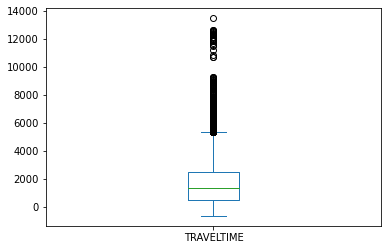

In [117]:
dfroute1['TRAVELTIME'].plot(kind='box')

<AxesSubplot:xlabel='PROGRNUMBER', ylabel='TRAVELTIME'>

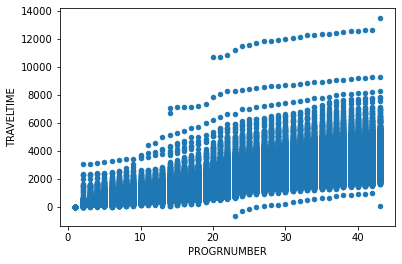

In [118]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
dfroute1[['PROGRNUMBER', 'TRAVELTIME']].plot(kind='scatter', x='PROGRNUMBER', y='TRAVELTIME')

In [119]:
# printing negative travel times
dfroute1[['TRIPID', 'TRAVELTIME']].loc[dfroute1['TRAVELTIME'] < 0]

,TRIPID,TRAVELTIME
1168186,8100476,-661.0
1168187,8100476,-291.0
1168189,8100476,-139.0
1168206,8100476,-17.0


In [120]:
# printing travel times larger than 5 times the mean
dfroute1[['TRIPID', 'TRAVELTIME']].loc[dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean()*5]

,TRIPID,TRAVELTIME
346424,6626022,13464.0
749477,7331176,7640.0
749478,7331176,7686.0
749479,7331176,7715.0
749480,7331176,7761.0
...,...,...
1204118,8156147,9124.0
1204119,8156147,8526.0
1204120,8156147,8699.0
1204121,8156147,8744.0


In [121]:
# printing travel times larger than 3 times the mean
dfroute1[['TRIPID', 'TRAVELTIME']].loc[dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean()*3]

,TRIPID,TRAVELTIME
4340,5963397,4872.0
4341,5963397,4756.0
4342,5963397,4707.0
4343,5963397,4644.0
4370,5963397,4928.0
...,...,...
1269562,8585438,4661.0
1269563,8585438,4682.0
1269564,8585438,4729.0
1269565,8585438,4768.0


In [122]:
dfroute1.shape

(1294954, 43)

In [123]:
# list of indices of bad times
badTimesIndexList = dfroute1[['TRIPID', 'DAYOFSERVICE', 'TRAVELTIME']].loc[(dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean()*4) | (dfroute1['TRAVELTIME'] < 0)].index.tolist()

In [124]:
# list trip and dayofservice for all trips with outlier data (4 times above mean travel time or below 0 travel time)
dfr1badtimes = dfroute1[['TRIPID', 'DAYOFSERVICE', 'TRAVELTIME']].loc[(dfroute1['TRAVELTIME'] > dfroute1['TRAVELTIME'].mean()*4) | (dfroute1['TRAVELTIME'] < 0)]

In [125]:
dfr1badtimes.shape

(336, 3)

In [126]:
# list of indices of bad trips
badTripsIndexList = dfroute1.loc[(dfroute1['DAYOFSERVICE'].isin(dfr1badtimes['DAYOFSERVICE'].unique())) & (dfroute1['TRIPID'].isin(dfr1badtimes['TRIPID'].unique()))].index.tolist()

In [127]:
len(badTripsIndexList)

2304

In [128]:
# dropping bad trips from route 1 dataframe
dfroute1 = dfroute1.drop(badTripsIndexList)

In [129]:
dfroute1.shape

(1292650, 43)

<AxesSubplot:xlabel='PROGRNUMBER', ylabel='TRAVELTIME'>

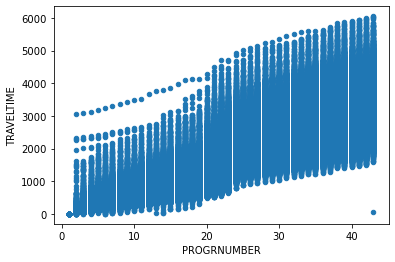

In [130]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
dfroute1[['PROGRNUMBER', 'TRAVELTIME']].plot(kind='scatter', x='PROGRNUMBER', y='TRAVELTIME')

This data already looks a lot more promising. Now I want to look at stop time and remove any trips which were stopped for too long.

In [131]:
dfr1longstops = dfroute1.loc[dfroute1['STOPTIME'] > 600]

In [132]:
dfr1longstops.shape

(401, 43)

401 trips were stopped for at least 10 minutes at a single time. Let's see how may different rows this affected in our route 1 dataframe.

In [133]:
longStopsIndexList = dfroute1.loc[(dfroute1['DAYOFSERVICE'].isin(dfr1longstops['DAYOFSERVICE'].unique())) & (dfroute1['TRIPID'].isin(dfr1longstops['TRIPID'].unique()))].index.tolist()

In [134]:
len(longStopsIndexList)

38295

In [135]:
# dropping trips which had stops which lasted for over 10 minutes
dfroute1 = dfroute1.drop(longStopsIndexList)

In [136]:
dfroute1.shape

(1254355, 43)

<AxesSubplot:xlabel='PROGRNUMBER', ylabel='TRAVELTIME'>

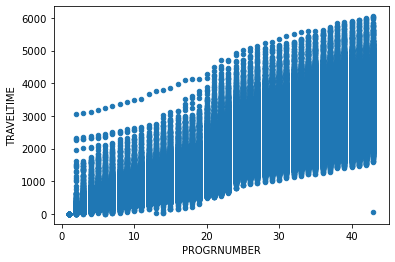

In [137]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
dfroute1[['PROGRNUMBER', 'TRAVELTIME']].plot(kind='scatter', x='PROGRNUMBER', y='TRAVELTIME')

In [138]:
dfroute1.loc[(dfroute1['PROGRNUMBER'] > 40) & (dfroute1['TRAVELTIME'] < 200)]

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24
1167209,2018-11-10,8101330,43,226,31123,31123,30650,30650,2172287,2,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# dropping this outlier
dfroute1 = dfroute1.drop(1167209)

Now I would like to look at how many trips do not have an entry 1 in PROGRNUMBER.

In [140]:
# rows with 1 as PROGRNUMBER
dfr1prog1 = dfroute1.loc[dfroute1['PROGRNUMBER'] == 1]

In [141]:
dfr1prog1.shape

(31838, 43)

In [142]:
# index list for routes with a 1 progress number
prog1IndexList = dfroute1.loc[(dfroute1['DAYOFSERVICE'].isin(dfr1prog1['DAYOFSERVICE'].unique())) & (dfroute1['TRIPID'].isin(dfr1prog1['TRIPID'].unique()))].index.tolist()

In [143]:
len(prog1IndexList)

1254354

In [144]:
noprog1 = dfroute1.drop(prog1IndexList)

In [145]:
print(noprog1)

Empty DataFrame
Columns: [DAYOFSERVICE, TRIPID, PROGRNUMBER, STOPPOINTID, PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP, VEHICLEID, DIRECTION, STOPTIME, TRIPSTART, TRAVELTIME, MONTHOFYEAR, DAYOFWEEK, HOUROFDAY, temp, wind_speed, w_main_Clouds, w_main_Drizzle, w_main_Fog, w_main_Mist, w_main_Rain, w_main_Smoke, w_main_Snow, h_7, h_8, h_9, h_10, h_11, h_12, h_13, h_14, h_15, h_16, h_17, h_18, h_19, h_20, h_21, h_22, h_23, h_24]
Index: []

[0 rows x 43 columns]


It appears that all trips have a 1 progress number which is good, however, it does not explain the strange graph which shows major delays to certain trips. Let's instead look at trips which have over 600 travel time by stop 2.

In [146]:
# route 1 trips which took over 10 mins to reach second stop
dfr1longstart = dfroute1.loc[(dfroute1['TRAVELTIME'] > 600) & (dfroute1['PROGRNUMBER'] == 2)]

There are only 27 such trips, which are worth dropping.

In [147]:
# index list for rows with over 600 travel time by stop 2
longStartIndexList = dfroute1.loc[(dfroute1['DAYOFSERVICE'].isin(dfr1longstart['DAYOFSERVICE'].unique())) & (dfroute1['TRIPID'].isin(dfr1longstart['TRIPID'].unique()))].index.tolist()

In [148]:
len(longStartIndexList)

1459

In [149]:
# dropping trips which had over 600 travel time by stop 2
dfroute1 = dfroute1.drop(longStartIndexList)

In [150]:
dfroute1.shape

(1252895, 43)

<AxesSubplot:xlabel='PROGRNUMBER', ylabel='TRAVELTIME'>

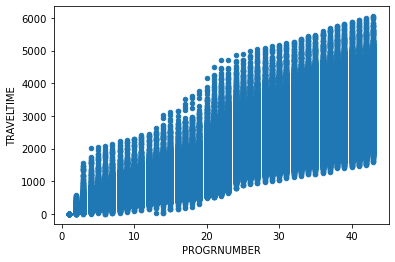

In [151]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
dfroute1[['PROGRNUMBER', 'TRAVELTIME']].plot(kind='scatter', x='PROGRNUMBER', y='TRAVELTIME')

This data looks great. Let's see if our best model can get better using this data instead.

In [152]:
# 70/30 train/test split for route 1 data
trainroute1 = dfroute1.sample(frac=0.7, random_state=1)
testroute1 = dfroute1.drop(trainroute1.index)

In [153]:
# descriptive features (same as last model)
r1features5 = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23', 'h_24']

X = trainroute1[r1features5]
y = trainroute1['TRAVELTIME']

In [154]:
# fitting the model
linreg5r1 = LinearRegression().fit(X, y)

In [155]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg5r1.intercept_)
print("Features and coeficients:", list(zip(r1features5, linreg5r1.coef_)))

Intercept:  -441.6904150108121
Features and coeficients: [('PROGRNUMBER', 84.21757207931836), ('DIRECTION', 76.5254409279265), ('DAYOFWEEK', -14.546318667414255), ('MONTHOFYEAR', 4.983714550702054), ('temp', -1.8217152123292735), ('w_main_Clouds', -10.807126356078362), ('w_main_Drizzle', -20.048341776472), ('w_main_Fog', -32.75347342434335), ('w_main_Mist', 66.82873859602606), ('w_main_Rain', 13.072103413653663), ('w_main_Smoke', -46.32846142292939), ('w_main_Snow', -115.20184608297534), ('h_7', 27.97236401775623), ('h_8', 199.7906486682345), ('h_9', 285.27856732169846), ('h_10', 115.52812554019158), ('h_11', 98.13603622024762), ('h_12', 122.65109182846544), ('h_13', 149.16718272000935), ('h_14', 140.49421055867316), ('h_15', 164.84121282735964), ('h_16', 193.1768151757664), ('h_17', 269.4702524607105), ('h_18', 291.69604021962067), ('h_19', 120.61389028947036), ('h_20', -41.55732399397651), ('h_21', -194.27536418723113), ('h_22', -304.55031628217813), ('h_23', -273.46928678508556), ('

In [156]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg5r1_predictions = linreg5r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg5r1 = pd.concat([y.head(20), pd.DataFrame(linreg5r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg5r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
1242572       337.0   441.316999
390663       2636.0  2606.562523
1013310       955.0   653.526336
376603       2583.0  2463.793414
33200        2644.0  2211.615798
57801         656.0  1087.235178
1132178      1835.0  2253.646719
884567       1705.0  1944.540350
354721       2578.0  2724.354206
981918         39.0   -75.099110
1046230       724.0   900.587699
1103490      3233.0  2918.208942
91848         128.0   182.227436
802780        824.0  1318.040110
165600        727.0   966.583124
1256476      1111.0  1438.470385
58433        2792.0  3185.169473
846096       2169.0  1803.336455
1236084      1619.0  1701.627665
993805        985.0  1091.199100


In [157]:
# predicting the travel time for entire test dataframe
linreg5r1_test_predictions = linreg5r1.predict(testroute1[r1features5])

In [158]:
# difference between test travel times and test predictions
r1prediction_diffs5 = testroute1['TRAVELTIME'] - linreg5r1_test_predictions

In [159]:
# calculating root mean square error
r1_linmodel5_rmse = ((r1prediction_diffs5**2).mean())**0.5
print("RMSE:", r1_linmodel5_rmse)

RMSE: 348.27747574675976


In [160]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg5r1_test_predictions))

R2 score: 0.9004626159049346


As expected, the results have improved. We now have an average error of 5 minutes and 48 seconds and an R2 score of 0.9, an improvement on the last model, which had 6 minutes 5 seconds and 0.891 as its results.

## 3.5 Implementing Hour as a Non-linear Factor

In [161]:
# dropping the hour dummy columns
dfroute1 = dfroute1.drop(columns=['h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23', 'h_24'])

In [162]:
# saving cleaned dfroute1 to csv
dfroute1.to_csv("route1-leavetimes-cleaned2.csv", index=False)

In [163]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,HOUROFDAY,temp,wind_speed,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,13,7.43,12.86,0,0,0,0,1,0,0


<AxesSubplot:xlabel='HOUROFDAY', ylabel='TRAVELTIME'>

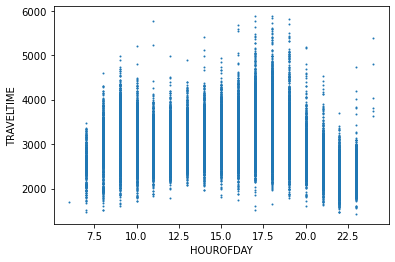

In [164]:
# looking at relationship between hour and travel time
dfroute1[['HOUROFDAY', 'TRAVELTIME']].loc[dfroute1['PROGRNUMBER'] == 40].plot(kind='scatter', x='HOUROFDAY', y='TRAVELTIME', s=1)

There appears to be two peaks in the hour data. This leads me to believe that we can capture this feature's predictive power using a quartic polynomial function.

In [165]:
# adding HOUROFDAY squared, cubed and to the power of 4 as columns
dfroute1['HOUROFDAY**2'] = dfroute1['HOUROFDAY']**2
dfroute1['HOUROFDAY**3'] = dfroute1['HOUROFDAY']**3
dfroute1['HOUROFDAY**4'] = dfroute1['HOUROFDAY']**4
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561


In [166]:
# 70/30 train/test split for route 1 data
trainroute1 = dfroute1.sample(frac=0.7, random_state=1)
testroute1 = dfroute1.drop(trainroute1.index)

<b>Linear Model with Hour as Quadratic Factor</b>

In [167]:
# descriptive features
r1features6 = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY', 'HOUROFDAY**2']

X = trainroute1[r1features6]
y = trainroute1['TRAVELTIME']

In [168]:
# fitting the model
linreg6r1 = LinearRegression().fit(X, y)

In [169]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg6r1.intercept_)
print("Features and coeficients:", list(zip(r1features6, linreg6r1.coef_)))

Intercept:  -1046.512121010601
Features and coeficients: [('PROGRNUMBER', 84.11131715943938), ('DIRECTION', 78.51016124026124), ('DAYOFWEEK', -15.756654210370229), ('MONTHOFYEAR', 5.574674320153327), ('temp', -2.244535328671141), ('w_main_Clouds', -21.571863192187017), ('w_main_Drizzle', -24.49540518263429), ('w_main_Fog', 22.095592415583578), ('w_main_Mist', 51.11259708602281), ('w_main_Rain', 3.5626498877738038), ('w_main_Smoke', -126.32513073955347), ('w_main_Snow', -107.84008233439349), ('HOUROFDAY', 129.55796090869515), ('HOUROFDAY**2', -5.004048461838892)]


In [170]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg6r1_predictions = linreg6r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg6r1 = pd.concat([y.head(20), pd.DataFrame(linreg6r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg6r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
1242572       337.0   542.430050
390663       2636.0  2697.775616
1013310       955.0   746.565290
376603       2583.0  2358.553758
33200        2644.0  2077.987674
57801         656.0   888.911504
1132178      1835.0  2272.524921
884567       1705.0  1847.027735
354721       2578.0  2790.047715
981918         39.0    -8.833698
1046230       724.0   971.394054
1103490      3233.0  2831.338295
91848         128.0    81.934605
802780        824.0  1116.819429
165600        727.0   823.665549
1256476      1111.0  1454.082471
58433        2792.0  3254.752125
846096       2169.0  1906.073915
1236084      1619.0  1688.832482
993805        985.0  1073.761231


In [171]:
# predicting the travel time for entire test dataframe
linreg6r1_test_predictions = linreg6r1.predict(testroute1[r1features6])

In [172]:
# difference between test travel times and test predictions
r1prediction_diffs6 = testroute1['TRAVELTIME'] - linreg6r1_test_predictions

In [173]:
# calculating root mean square error
r1_linmodel6_rmse = ((r1prediction_diffs6**2).mean())**0.5
print("RMSE:", r1_linmodel6_rmse)

RMSE: 361.42079249861155


In [174]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg6r1_test_predictions))

R2 score: 0.8928081627988077


<b>Linear Model with Hour as Quartic Factor</b>

In [175]:
# descriptive features
r1features7 = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY', 'HOUROFDAY**2', 'HOUROFDAY**3', 'HOUROFDAY**4']

X = trainroute1[r1features7]
y = trainroute1['TRAVELTIME']

In [176]:
# fitting the model
linreg7r1 = LinearRegression().fit(X, y)

In [177]:
# printing the intercept and weights learned for each feature
print("Intercept: ", linreg7r1.intercept_)
print("Features and coeficients:", list(zip(r1features7, linreg7r1.coef_)))

Intercept:  -1176.6618972756362
Features and coeficients: [('PROGRNUMBER', 84.3288287523119), ('DIRECTION', 78.17136048582307), ('DAYOFWEEK', -14.779691354324152), ('MONTHOFYEAR', 5.177108626328765), ('temp', -1.7550778188042258), ('w_main_Clouds', -14.443041060515807), ('w_main_Drizzle', -16.184834469111827), ('w_main_Fog', 16.36157394758295), ('w_main_Mist', 39.930146684195), ('w_main_Rain', 10.65120678782692), ('w_main_Smoke', -74.34471308009556), ('w_main_Snow', -102.27295556989698), ('HOUROFDAY', 292.2237983162515), ('HOUROFDAY**2', -37.55582554255064), ('HOUROFDAY**3', 2.1818881333601396), ('HOUROFDAY**4', -0.04693789344257482)]


In [178]:
# predicting the travel time for the first 20 rows of the training dataframe
linreg7r1_predictions = linreg7r1.predict(X.head(20))

print("Predictions for first 20 rows of training dataframe: \n")
actual_vs_pred_linreg7r1 = pd.concat([y.head(20), pd.DataFrame(linreg7r1_predictions, columns=['Predicted'], index=y.head(20).index)], axis=1)
print(actual_vs_pred_linreg7r1)

Predictions for first 20 rows of training dataframe: 

         TRAVELTIME    Predicted
1242572       337.0   482.471472
390663       2636.0  2648.566808
1013310       955.0   693.515926
376603       2583.0  2392.159241
33200        2644.0  2129.755124
57801         656.0   950.704322
1132178      1835.0  2336.605063
884567       1705.0  1873.731830
354721       2578.0  2749.100420
981918         39.0   -45.828633
1046230       724.0   924.454598
1103490      3233.0  2910.085440
91848         128.0   105.978129
802780        824.0  1182.418097
165600        727.0   816.247270
1256476      1111.0  1514.796146
58433        2792.0  3210.188084
846096       2169.0  1862.093935
1236084      1619.0  1700.722859
993805        985.0  1088.067631


In [179]:
# predicting the travel time for entire test dataframe
linreg7r1_test_predictions = linreg7r1.predict(testroute1[r1features7])

In [180]:
# difference between test travel times and test predictions
r1prediction_diffs7 = testroute1['TRAVELTIME'] - linreg7r1_test_predictions

In [181]:
# calculating root mean square error
r1_linmodel7_rmse = ((r1prediction_diffs7**2).mean())**0.5
print("RMSE:", r1_linmodel7_rmse)

RMSE: 357.4232771141824


In [182]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], linreg7r1_test_predictions))

R2 score: 0.8951662523006215


<b>Other Non-linear Factors</b>

<AxesSubplot:xlabel='DAYOFWEEK', ylabel='TRAVELTIME'>

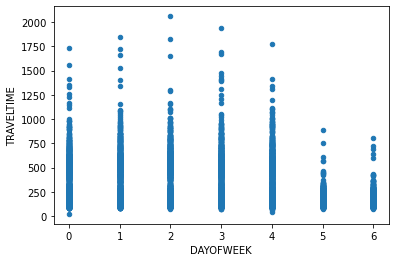

In [183]:
# dayofweek vs traveltime
dfroute1[['DAYOFWEEK', 'TRAVELTIME']].loc[dfroute1['PROGRNUMBER'] == 5].plot(kind='scatter', x='DAYOFWEEK', y='TRAVELTIME')

<AxesSubplot:xlabel='MONTHOFYEAR', ylabel='TRAVELTIME'>

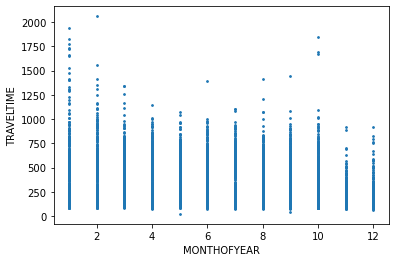

In [184]:
# monthofyear vs traveltime
dfroute1[['MONTHOFYEAR', 'TRAVELTIME']].loc[dfroute1['PROGRNUMBER'] == 5].plot(kind='scatter', x='MONTHOFYEAR', y='TRAVELTIME', s=3)

<AxesSubplot:xlabel='temp', ylabel='TRAVELTIME'>

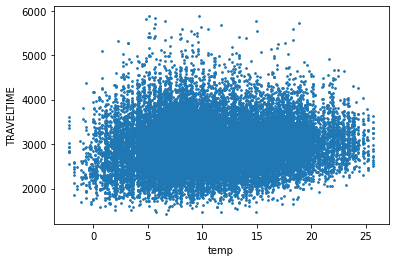

In [185]:
# temp vs traveltime
dfroute1[['temp', 'TRAVELTIME']].loc[dfroute1['PROGRNUMBER'] == 40].plot(kind='scatter', x='temp', y='TRAVELTIME', s=3)

# 4 - Historical Average Models

## 4.1 - Simple Historical Average Model

In [186]:
# creating dataframe for average travel times for each hour of day, day of week and progress number using training data
daylist = []
hourlist = []
proglist = []
ttalist = []

for day in trainroute1['DAYOFWEEK'].unique():
    for hour in trainroute1['HOUROFDAY'].unique():
        for num in trainroute1['PROGRNUMBER'].unique():
            daylist += [day]
            hourlist += [hour]
            proglist += [num]
            ttalist += [trainroute1['TRAVELTIME'].loc[(trainroute1['DAYOFWEEK'] == day) & (trainroute1['HOUROFDAY'] == hour) & (trainroute1['PROGRNUMBER'] == num)].mean()]
                                           
dfhist = pd.DataFrame({'DAYOFWEEK': daylist, 'HOUROFDAY': hourlist, 'PROGRNUMBER': proglist, 'TRAVELTIMEAVG': ttalist})

In [187]:
dfhist.head()

,DAYOFWEEK,HOUROFDAY,PROGRNUMBER,TRAVELTIMEAVG
0,1,12,7,339.117371
1,1,12,34,2702.971564
2,1,12,11,552.189573
3,1,12,31,2491.188940
4,1,12,27,2217.693780


In [188]:
# merging with test data to calculate results
dfhistres = testroute1[['DAYOFSERVICE', 'TRIPID', 'DAYOFWEEK', 'HOUROFDAY', 'PROGRNUMBER', 'TRAVELTIME']].merge(dfhist, on=['DAYOFWEEK', 'HOUROFDAY', 'PROGRNUMBER'])

In [189]:
dfhistres.head()

,DAYOFSERVICE,TRIPID,DAYOFWEEK,HOUROFDAY,PROGRNUMBER,TRAVELTIME,TRAVELTIMEAVG
0,2018-01-01,5972116,0,13,13,631.0,672.364035
1,2018-01-08,6100926,0,13,13,661.0,672.364035
2,2018-01-15,6114209,0,13,13,711.0,672.364035
3,2018-01-22,6224845,0,13,13,642.0,672.364035
4,2018-01-22,6219267,0,13,13,848.0,672.364035


In [190]:
nanhistindex = dfhistres['TRAVELTIMEAVG'].loc[dfhistres['TRAVELTIMEAVG'].isna() == True].index.tolist()

In [191]:
# dropping NaN rows
#dfhistres = dfhistres.drop(nanhistindex)

In [192]:
# difference between test travel times and test predictions
r1prediction_diffs6 = dfhistres['TRAVELTIME'] - dfhistres['TRAVELTIMEAVG']

In [193]:
# calculating root mean square error
r1_histmodel_rmse = ((r1prediction_diffs6**2).mean())**0.5
print("RMSE:", r1_histmodel_rmse)

RMSE: 275.79157123234404


In [194]:
# printing r2 score
#print("R2 score:", r2_score(dfhistres['TRAVELTIME'], dfhistres['TRAVELTIMEAVG']))

These are the best scores so far. However, we had to drop 19 rows for it to work, so it is not without fault.

## 4.2 - Hybrid - Simple Historical Average and Linear Regression

In [195]:
# merging test results from last linreg model with testroute1 to get hour, day and progress number
testroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
6,2018-01-01,5972116,18,48,48366,48366,48189,48189,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
19,2018-01-01,5972116,33,390,49755,49755,49310,49310,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
22,2018-01-01,5972116,37,375,49948,49948,49466,49466,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
25,2018-01-01,5972116,1,226,47400,47400,47427,47427,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561


In [196]:
testcopy = testroute1

In [197]:
testcopy.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
6,2018-01-01,5972116,18,48,48366,48366,48189,48189,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
19,2018-01-01,5972116,33,390,49755,49755,49310,49310,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
22,2018-01-01,5972116,37,375,49948,49948,49466,49466,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
25,2018-01-01,5972116,1,226,47400,47400,47427,47427,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561


In [198]:
# adding predictions from linmodel7 to the testcopy dataframe
testcopy['LINMODELPRED'] = linreg7r1.predict(testcopy[r1features7])

In [199]:
testcopy.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4,LINMODELPRED
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,1,0,0,169,2197,28561,905.562240
6,2018-01-01,5972116,18,48,48366,48366,48189,48189,2693211,1,...,0,0,0,1,0,0,169,2197,28561,1327.206384
19,2018-01-01,5972116,33,390,49755,49755,49310,49310,2693211,1,...,0,0,0,1,0,0,169,2197,28561,2592.138815
22,2018-01-01,5972116,37,375,49948,49948,49466,49466,2693211,1,...,0,0,0,1,0,0,169,2197,28561,2929.454130
25,2018-01-01,5972116,1,226,47400,47400,47427,47427,2693211,1,...,0,0,0,1,0,0,169,2197,28561,-106.383705


In [200]:
dfhistres.head()

,DAYOFSERVICE,TRIPID,DAYOFWEEK,HOUROFDAY,PROGRNUMBER,TRAVELTIME,TRAVELTIMEAVG
0,2018-01-01,5972116,0,13,13,631.0,672.364035
1,2018-01-08,6100926,0,13,13,661.0,672.364035
2,2018-01-15,6114209,0,13,13,711.0,672.364035
3,2018-01-22,6224845,0,13,13,642.0,672.364035
4,2018-01-22,6219267,0,13,13,848.0,672.364035


In [201]:
# merging testcopy and dfhistres on dayofservice, tripid and progrnumber
dfhistres = dfhistres.merge(testcopy[['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'LINMODELPRED']], on=['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER'])

In [202]:
dfhistres.shape

(376693, 8)

In [203]:
dfhistres.head()

,DAYOFSERVICE,TRIPID,DAYOFWEEK,HOUROFDAY,PROGRNUMBER,TRAVELTIME,TRAVELTIMEAVG,LINMODELPRED
0,2018-01-01,5972116,0,13,13,631.0,672.364035,905.562240
1,2018-01-08,6100926,0,13,13,661.0,672.364035,885.013644
2,2018-01-15,6114209,0,13,13,711.0,672.364035,959.446688
3,2018-01-22,6224845,0,13,13,642.0,672.364035,957.551204
4,2018-01-22,6219267,0,13,13,848.0,672.364035,957.551204


In [204]:
cols = ['DAYOFSERVICE', 'TRIPID', 'DAYOFWEEK', 'HOUROFDAY', 'PROGRNUMBER', 'TRAVELTIME', 'TRAVELTIMEAVG', 'LINMODELPRED']
for col in cols:
    print("Null values in", col, dfhistres[col].isna().sum())

Null values in DAYOFSERVICE 0
Null values in TRIPID 0
Null values in DAYOFWEEK 0
Null values in HOUROFDAY 0
Null values in PROGRNUMBER 0
Null values in TRAVELTIME 0
Null values in TRAVELTIMEAVG 19
Null values in LINMODELPRED 0


In [205]:
nanindices = dfhistres.loc[dfhistres['TRAVELTIMEAVG'].isna() == True].index

In [206]:
# dropping null values from dfhistres
dfhistres = dfhistres.drop(nanindices)

In [207]:
# column for average of linear model and historical average model
dfhistres['HYBRIDPRED'] = (dfhistres['TRAVELTIMEAVG'] + dfhistres['LINMODELPRED']) / 2.0

In [208]:
# difference between actual travel time and hybrid model predictions
hybrid_pred_diffs = dfhistres['TRAVELTIME'] - dfhistres['HYBRIDPRED']

In [209]:
# calculating root mean square error
r1_hybrid_rmse = ((hybrid_pred_diffs**2).mean())**0.5
print("RMSE:", r1_hybrid_rmse)

RMSE: 296.19922527056855


In [210]:
# printing r2 score
print("R2 score:", r2_score(dfhistres['TRAVELTIME'], dfhistres['HYBRIDPRED']))

R2 score: 0.9279940288901376


This hybrid model (historical average and linear regression) has the best results of all the models so far which incorporates the weather. However, this might be difficult to implement into the app due to the size of the historical average model and the likelihood that some routes will not have an average time for some hour/day/progrnumber combination.

# 5 - Cleaning Full Leave Times File

In [211]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TRAVELTIME,MONTHOFYEAR,DAYOFWEEK,HOUROFDAY
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,2924.0,2,2,24
1,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,4247.0,2,2,10
2,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,4020.0,2,2,16
3,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,3074.0,2,2,23
4,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,4481.0,2,2,11


In [217]:
dftrips['LINEID'].unique()[129:]

array(['41D'], dtype=object)

In [218]:
lineidsleft = dftrips['LINEID'].unique()[129:]

In [214]:
import time

In [219]:
count = 130

#meanlist = []

start_time = time.time()

# looping over each lineid
for lineid in lineidsleft:
    
    now = time.time()
    timer = now - start_time
    print("Now working on line:", lineid, "number", count, "in the sequence. Time since start", timer)
    count += 1
    
    # collecting all trip ids associated with the line id in the loop
    trip_id_list = dftrips['TRIPID'][dftrips['LINEID'] == lineid].tolist()
    
    # list of dataframes to concatenate
    df_list = []
    
    # iterating over each chunk in the leave times cleaned csv
    chunksize = 10 ** 6
    for chunk in pd.read_csv("rt_leavetimes-cleaned.csv", chunksize=chunksize):
        #parse_dates=[0], infer_datetime_format=True
        
        # adding the data in the chunk if the trip id is in the list we specified earlier
        df_list.append(chunk[chunk['TRIPID'].isin(trip_id_list)])
        
        sizesum = 0
        for dfl in df_list:
            sizesum += dfl.shape[0]
            
        # stop reading if we have over 1100 rows
        if sizesum > 1100:
            break
        
    # concatenating all of the data for the lineid
    dfline = pd.concat(df_list)
    
    # randomly choosing 1000 rows where progress number is at least 3
    #dfline = dfline.loc[dfline['PROGRNUMBER'] > 2].sample(n=1000, random_state=1)
    
    # adding STOPTIME column to the line dataframe
    dfline['STOPTIME'] = dfline['ACTUALTIME_DEP'] - dfline['ACTUALTIME_ARR']
    
    # converting line DAYOFSERVICE to datetime
    dfline['DAYOFSERVICE'] = dfline['DAYOFSERVICE'].astype('datetime64')
    
    # adding TRIPSTART to line dataframe which is the departure time for the entire trip
    dflinenew = dfline.merge(dftrips, on = ['DAYOFSERVICE', 'TRIPID'])
    
    # keeping only the columns we want for dfline
    dfline = dflinenew[['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 'PLANNEDTIME_ARR_x', 'PLANNEDTIME_DEP_x', 'ACTUALTIME_ARR_x', 'ACTUALTIME_DEP_x', 'VEHICLEID', 'DIRECTION', 'STOPTIME', 'ACTUALTIME_DEP_y']]
    
    # renaming the new columns
    dfline = dfline.rename(columns={'PLANNEDTIME_ARR_x':'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP_x':'PLANNEDTIME_DEP', 'ACTUALTIME_ARR_x':'ACTUALTIME_ARR', 'ACTUALTIME_DEP_x':'ACTUALTIME_DEP', 'ACTUALTIME_DEP_y':'TRIPSTART'})
    
    # adding a column for time since start of the trip, or TRAVELTIME, calculated as ACTUALTIME_ARR - TRIPSTART
    dfline['TRAVELTIME'] = dfline['ACTUALTIME_ARR'] - dfline['TRIPSTART']
    
    # adding month of year column for line dataframe
    dfline['MONTHOFYEAR'] = dfline['DAYOFSERVICE'].dt.month
    
    # adding day column for line dataframe
    dfline['DAYOFWEEK'] = dfline['DAYOFSERVICE'].dt.dayofweek
    
    # adding hour column for line dataframe
    dfline['HOUROFDAY'] = (dfline['ACTUALTIME_DEP'] // 3600).astype(int)
    
    # converting line DAYOFSERVICE to datetime
    dfline['DAYOFSERVICE'] = dfline['DAYOFSERVICE'].astype('datetime64')
    
    # merging line data with weather data (merge on date and hour, keep temp, wind_speed and w_main dummies)
    dfline = dfline.merge(dfw[['temp', 'wind_speed', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'DAYOFSERVICE', 'HOUROFDAY']], on=['DAYOFSERVICE', 'HOUROFDAY'])
    
    # list trip and dayofservice for all trips with outlier data (4 times above mean travel time or below 0 travel time)
    dflinebadtimes = dfline[['TRIPID', 'DAYOFSERVICE', 'TRAVELTIME']].loc[(dfline['TRAVELTIME'] > dfline['TRAVELTIME'].mean()*4) | (dfline['TRAVELTIME'] < 0)]
    
    # list of indices of bad trips
    badTripsIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinebadtimes['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinebadtimes['TRIPID'].unique()))].index.tolist()
    
    # dropping bad trips from line dataframe
    dfline = dfline.drop(badTripsIndexList)
    
    # looking at long stops (10 mins plus)
    dflinelongstops = dfline.loc[dfline['STOPTIME'] > 600]
    
    # index list for long stops trips
    longStopsIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinelongstops['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinelongstops['TRIPID'].unique()))].index.tolist()
    
    # dropping trips which had stops which lasted for over 10 minutes
    dfline = dfline.drop(longStopsIndexList)
    
    # line trips which took over 10 mins to reach second stop
    dflinelongstart = dfline.loc[(dfline['TRAVELTIME'] > 600) & (dfline['PROGRNUMBER'] == 2)]
    
    # index list for rows with over 600 travel time by stop 2
    longStartIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinelongstart['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinelongstart['TRIPID'].unique()))].index.tolist()
    
    # dropping trips which had over 600 travel time by stop 2
    dfline = dfline.drop(longStartIndexList)
    
    #meanlist += [dfline['TRAVELTIME'].mean()]
    
    # adding HOUROFDAY squared, cubed and to the power of 4 as columns
    #dfline['HOUROFDAY**2'] = dfline['HOUROFDAY']**2
    #dfline['HOUROFDAY**3'] = dfline['HOUROFDAY']**3
    #dfline['HOUROFDAY**4'] = dfline['HOUROFDAY']**4
    
    # 70/30 train/test split for line data
    trainline = dfline.sample(frac=0.7, random_state=1)
    testline = dfline.drop(trainline.index)
    
    # descriptive features
    linefeatures = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']

    #X = trainline[linefeatures]
    #y = trainline['TRAVELTIME']
    
    # fitting the model
    #linregline = LinearRegression().fit(X, y)
    
    # save the model to pickle file
    #filename = "LinRegPickleFiles/linreg_{}.sav".format(lineid)
    #pickle.dump(linregline, open(filename, 'wb'))
    
    # opening knn joblib file
    fn = "KNNJoblibFiles/knn_{}.joblib".format(lineid)
    with open(fn, 'rb') as knnfile:
        knnmodel = joblib.load(knnfile)
        
    # predicting for test dataframe using knn model
    knntestpred = knnmodel.predict(testline[['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']])
    
    act_pred_knn = pd.concat([testline['TRAVELTIME'], pd.DataFrame(knntestpred, columns=['Predicted'], index=testline['TRAVELTIME'].index)], axis=1)
    
    act_pred_knn['DIFF_DIV_ACT'] = (act_pred_knn['Predicted'] - act_pred_knn['TRAVELTIME']) / (act_pred_knn['TRAVELTIME'] + 1.0)
    
    # saving the correct distribution to csv file
    act_pred_knn['DIFF_DIV_ACT'].to_csv("knn_dist_csvs/knn_dist_{}".format(lineid), header=False, index=False)
    
    # testing the model
    # predicting the travel time for entire test dataframe
    #linregline_test_predictions = linregline.predict(testline[linefeatures])
    
    # difference between test travel times and test predictions
    #lineprediction_diffs = testline['TRAVELTIME'] - linregline_test_predictions
    
    # calculating root mean square error
    #line_linmodel_rmse = ((lineprediction_diffs**2).mean())**0.5
    
    # printing r2 score
    #line_r2 = r2_score(testline['TRAVELTIME'], linregline_test_predictions)
    
    # writing these scores to a file
    #f = open("linreg_results.txt", "a")
    #f.write("\nLine: " + str(lineid) + ". RMSE: " + str(line_linmodel_rmse) + ". R2 Score: " + str(line_r2) + ".\n")
    #f.close()
    
    
print("FINISHED")

Now working on line: 41D number 130 in the sequence. Time since start 0.0010912418365478516
FINISHED


In [213]:
import re

In [214]:
# adding rmse/mean travel time to the results file


# getting average travel time for each route
#meanlist = []
#for lineid in dftrips['LINEID'].unique():
#    meanlist += [dftrips['TRAVELTIME'].loc[dftrips['LINEID'] == lineid].mean() / 2.0]


#count = 0
#indexcount = 0

#rmsedivmeanlist = []

# reading from linreg_results.txt
#f = open("linreg_results.txt", "r")
#for line in f:
#    count += 1
#    if (count == 1) or (count % 2 == 0):
#        continue
#    rmse = float(re.findall("\d+\.\d+", line)[0])
#    rmsedivmeanlist += [rmse / meanlist[indexcount]]
#    indexcount += 1
    
#f.close()

In [215]:
#print rmsedivmeanlist

In [216]:
#print min(rmsedivmeanlist)

In [217]:
#print max(rmsedivmeanlist)

In [218]:
#sum = 0
#for i in rmsedivmeanlist:
#    sum += i
#print sum/len(rmsedivmeanlist)

In [219]:
#file = open("linreg_percent_results.txt", "a")
#file.write("RMSE scores divided by average travel time for each route.\nMean score: " + str(sum/len(rmsedivmeanlist)) + "\nMin score: " + str(min(rmsedivmeanlist)) + "\nMax score: " + str(max(rmsedivmeanlist)) + "\n\n")
#file.close()

# writing these scores to a file
#for i in range(130):
#    file = open("linreg_percent_results.txt", "a")
#    file.write("\nLine: " + str(dftrips['LINEID'].unique()[i]) + ". RMSE / Mean TT: " + str(rmsedivmeanlist[i]) + "." + ".\n")
#    file.close()

# 6 - K-Nearest Neighbours Regression

## 6.1 - Training KNN on the Route 1 Dataset

In [220]:
dfroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
1,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
2,2018-01-01,5972116,14,7603,48114,48114,48071,48071,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
3,2018-01-01,5972116,15,45,48155,48155,48089,48100,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561
4,2018-01-01,5972116,16,46,48221,48221,48137,48137,2693211,1,...,0,0,0,0,1,0,0,169,2197,28561


In [221]:
trainroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
1242572,2018-12-18,8459317,7,387,43489,43489,43587,43618,2868403,2,...,1,0,0,0,0,0,0,144,1728,20736
390663,2018-04-25,6633738,34,372,44525,44525,44625,44625,1000190,1,...,0,0,0,0,1,0,0,144,1728,20736
1013310,2018-10-13,8026160,11,4432,46180,46180,46561,46561,2534842,1,...,0,0,0,0,1,0,0,144,1728,20736
376603,2018-04-19,6632267,31,7602,31767,31767,32128,32141,2693266,2,...,1,0,0,0,0,0,0,64,512,4096
33200,2018-01-10,6100238,27,17,65193,65193,65048,65089,2693212,2,...,0,0,1,0,0,0,0,324,5832,104976


In [222]:
trainroute1.shape

(877026, 28)

In [223]:
# setting up model parameters
knnfeatures = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']

X = trainroute1[knnfeatures]
y = trainroute1['TRAVELTIME']

In [224]:
# fitting the model
knn = KNeighborsRegressor().fit(X, y)

In [225]:
# predicting for the test dataframe
knntestpred = knn.predict(testroute1[knnfeatures])

In [226]:
knntestpred

array([ 541.6,  778.6, 2086.6, ..., 1064.2, 1296.6, 1146.2])

In [227]:
# difference between test travel times and test predictions
knnprediction_diffs = testroute1['TRAVELTIME'] - knntestpred

In [228]:
# calculating root mean square error
knn_rmse = ((knnprediction_diffs**2).mean())**0.5
print("RMSE:", knn_rmse)

RMSE: 233.62109969575042


In [229]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], knntestpred))

R2 score: 0.9552122160455281


In [230]:
# saving pickle file as compressed
#sfile = bz2.BZ2File("KNNPickleFiles/test_r1.joblib", 'wb')
#joblib.dump(knn, sfile)
#sfile.close()

In [231]:
# unpickling compressed pickle file to get prediction
#fileName = "KNNPickleFiles/test_r1.joblib"
#with bz2.BZ2File(fileName, 'rb') as f:
#    model = joblib.load(f)

In [232]:
#float(model.predict(pd.DataFrame([[30, 1, 4, 12, 9.5, 0, 0, 0, 0, 0, 0, 0, 18]], columns=['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY'])))

Full dataframe model compressed as bz2 file is 10.8Mb on disk. It takes about 5 seconds to load this file. This is too long for predictions in our app and the file is also too big. We want the file to be around 2Mb and take less than a second to load the model. First I will see how changing the compression on the dump method affects the size of the joblib file and the amount of time it takes to load from disk.

In [233]:
#joblib.dump(knn, "KNNPickleFiles/test2_r1.joblib", compress=3)

In [234]:
#now = time.time()
#model2 = joblib.load("KNNPickleFiles/test2_r1.joblib")
#timer = time.time() - now
#print timer

Using compress=3, the file is 22.9Mb on disk and it takes 3.45 seconds to load. From these results, we must consider both a smaller (and less accurate) model and less compression so the model loads quicker.

In [235]:
# fitting second model on 10% of data
#knn2 = KNeighborsRegressor().fit(X.head(X.shape[0] // 10), y.head(X.shape[0] // 10))

In [236]:
# predicting for the test dataframe
#knntestpred2 = knn2.predict(testroute1[knnfeatures])

In [237]:
# difference between test travel times and test predictions
#knnprediction_diffs2 = testroute1['TRAVELTIME'] - knntestpred2

In [238]:
# calculating root mean square error
#knn2_rmse = ((knnprediction_diffs2**2).mean())**0.5
#print("RMSE:", knn2_rmse)

In [239]:
# printing r2 score
#print("R2 score:", r2_score(testroute1['TRAVELTIME'], knntestpred2))

In [240]:
#joblib.dump(knn2, "KNNPickleFiles/test3_r1.joblib", compress=0)

In [241]:
#now = time.time()
#model2 = joblib.load("KNNPickleFiles/test3_r1.joblib")
#timer = time.time() - now
#print timer

Model 10% of original size, 0 compression: 20.6Mb joblib file, 0.34 second load time and 274 RMSE for the model. The load time and accuracy are acceptable, however, the file size is still too big. I will try compression and see what happens.

In [242]:
#joblib.dump(knn2, "KNNPickleFiles/test5_r1.joblib", compress=1)

In [243]:
#now = time.time()
#model2 = joblib.load("KNNPickleFiles/test5_r1.joblib")
#timer = time.time() - now
#print timer

Model 10% of original size, 1 compression: 2.7Mb joblib file, 0.42 second load time and 274 RMSE for the model. Everything is acceptable, however, it is worth trying 2 compression to see if we can get a smaller file with similar load time.

In [244]:
#joblib.dump(knn2, "KNNPickleFiles/test6_r1.joblib", compress=2)

In [245]:
#now = time.time()
#model2 = joblib.load("KNNPickleFiles/test6_r1.joblib")
#timer = time.time() - now
#print timer

In [246]:
#joblib.dump(knn2, "KNNPickleFiles/test7_r1.joblib", compress=3)

In [247]:
#now = time.time()
#model2 = joblib.load("KNNPickleFiles/test7_r1.joblib")
#timer = time.time() - now
#print timer

I will use compress=3 and 10% of the model size for each route.

## 6.2 Training KNN on the Full Dataset and Saving Results

In [248]:
dftrips['LINEID'].unique()[96:]

array(['42D', '31B', '66X', '31D', '33D', '39X', '41B', '25B', '7D',
       '46E', '142', '118', '51D', '15D', '41A', '25D', '38D', '40B',
       '66B', '38B', '236', '7B', '41X', '40E', '70D', '69X', '116',
       '77X', '25X', '68X', '161', '16D', '33E', '41D'], dtype=object)

In [249]:
lineidsleft = dftrips['LINEID'].unique()[96:]

In [250]:
count = 97

#meanlist = []

start_time = time.time()

# looping over each lineid
for lineid in lineidsleft:
    
    now = time.time()
    timer = now - start_time
    print("Now working on line:", lineid, "number", count, "in the sequence. Time since start", timer)
    count += 1
    
    # collecting all trip ids associated with the line id in the loop
    trip_id_list = dftrips['TRIPID'][dftrips['LINEID'] == lineid].tolist()
    
    # list of dataframes to concatenate
    df_list = []
    
    # iterating over each chunk in the leave times cleaned csv
    chunksize = 10 ** 6
    for chunk in pd.read_csv("rt_leavetimes-cleaned.csv", chunksize=chunksize):
        #parse_dates=[0], infer_datetime_format=True
        
        # adding the data in the chunk if the trip id is in the list we specified earlier
        df_list.append(chunk[chunk['TRIPID'].isin(trip_id_list)])
        
    # concatenating all of the data for the lineid
    dfline = pd.concat(df_list)
    
    # setting dfline to a random 10% of its data
    dfline = dfline.sample(frac=0.1, random_state=2)
    
    # adding STOPTIME column to the line dataframe
    dfline['STOPTIME'] = dfline['ACTUALTIME_DEP'] - dfline['ACTUALTIME_ARR']
    
    # converting line DAYOFSERVICE to datetime
    dfline['DAYOFSERVICE'] = dfline['DAYOFSERVICE'].astype('datetime64')
    
    # adding TRIPSTART to line dataframe which is the departure time for the entire trip
    dflinenew = dfline.merge(dftrips, on = ['DAYOFSERVICE', 'TRIPID'])
    
    # keeping only the columns we want for dfline
    dfline = dflinenew[['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID', 'PLANNEDTIME_ARR_x', 'PLANNEDTIME_DEP_x', 'ACTUALTIME_ARR_x', 'ACTUALTIME_DEP_x', 'VEHICLEID', 'DIRECTION', 'STOPTIME', 'ACTUALTIME_DEP_y']]
    
    # renaming the new columns
    dfline = dfline.rename(columns={'PLANNEDTIME_ARR_x':'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP_x':'PLANNEDTIME_DEP', 'ACTUALTIME_ARR_x':'ACTUALTIME_ARR', 'ACTUALTIME_DEP_x':'ACTUALTIME_DEP', 'ACTUALTIME_DEP_y':'TRIPSTART'})
    
    # adding a column for time since start of the trip, or TRAVELTIME, calculated as ACTUALTIME_ARR - TRIPSTART
    dfline['TRAVELTIME'] = dfline['ACTUALTIME_ARR'] - dfline['TRIPSTART']
    
    # adding month of year column for line dataframe
    dfline['MONTHOFYEAR'] = dfline['DAYOFSERVICE'].dt.month
    
    # adding day column for line dataframe
    dfline['DAYOFWEEK'] = dfline['DAYOFSERVICE'].dt.dayofweek
    
    # adding hour column for line dataframe
    dfline['HOUROFDAY'] = (dfline['ACTUALTIME_DEP'] // 3600).astype(int)
    
    # converting line DAYOFSERVICE to datetime
    #dfline['DAYOFSERVICE'] = dfline['DAYOFSERVICE'].astype('datetime64')
    
    # merging line data with weather data (merge on date and hour, keep temp, wind_speed and w_main dummies)
    dfline = dfline.merge(dfw[['temp', 'wind_speed', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'DAYOFSERVICE', 'HOUROFDAY']], on=['DAYOFSERVICE', 'HOUROFDAY'])
    
    # list trip and dayofservice for all trips with outlier data (4 times above mean travel time or below 0 travel time)
    dflinebadtimes = dfline[['TRIPID', 'DAYOFSERVICE', 'TRAVELTIME']].loc[(dfline['TRAVELTIME'] > dfline['TRAVELTIME'].mean()*4) | (dfline['TRAVELTIME'] < 0)]
    
    # list of indices of bad trips
    badTripsIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinebadtimes['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinebadtimes['TRIPID'].unique()))].index.tolist()
    
    # dropping bad trips from line dataframe
    dfline = dfline.drop(badTripsIndexList)
    
    # looking at long stops (10 mins plus)
    dflinelongstops = dfline.loc[dfline['STOPTIME'] > 600]
    
    # index list for long stops trips
    longStopsIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinelongstops['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinelongstops['TRIPID'].unique()))].index.tolist()
    
    # dropping trips which had stops which lasted for over 10 minutes
    dfline = dfline.drop(longStopsIndexList)
    
    # line trips which took over 10 mins to reach second stop
    dflinelongstart = dfline.loc[(dfline['TRAVELTIME'] > 600) & (dfline['PROGRNUMBER'] == 2)]
    
    # index list for rows with over 600 travel time by stop 2
    longStartIndexList = dfline.loc[(dfline['DAYOFSERVICE'].isin(dflinelongstart['DAYOFSERVICE'].unique())) & (dfline['TRIPID'].isin(dflinelongstart['TRIPID'].unique()))].index.tolist()
    
    # dropping trips which had over 600 travel time by stop 2
    dfline = dfline.drop(longStartIndexList)
    
    #meanlist += [dfline['TRAVELTIME'].mean()]
    
    # adding HOUROFDAY squared, cubed and to the power of 4 as columns
    #dfline['HOUROFDAY**2'] = dfline['HOUROFDAY']**2
    #dfline['HOUROFDAY**3'] = dfline['HOUROFDAY']**3
    #dfline['HOUROFDAY**4'] = dfline['HOUROFDAY']**4
    
    # 70/30 train/test split for line data
    trainline = dfline.sample(frac=0.7, random_state=1)
    testline = dfline.drop(trainline.index)
    
    # descriptive features
    linefeatures = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']

    X = trainline[linefeatures]
    y = trainline['TRAVELTIME']
    
    # fitting the model
    knnline = KNeighborsRegressor().fit(X, y)
    
    # save the model to pickle file
    #filename = "KNNPickleFiles/knn_{}.sav".format(lineid)
    #pickle.dump(knnline, open(filename, 'wb'))
    
    # save the model to a joblib file
    filename = "KNNJoblibFiles/knn_{}.joblib".format(lineid)
    joblib.dump(knnline, filename, compress=3)
    
    
    # testing the model
    # predicting the travel time for entire test dataframe
    #knnline_test_predictions = knnline.predict(testline[linefeatures])
    
    # difference between test travel times and test predictions
    #knnlineprediction_diffs = testline['TRAVELTIME'] - knnline_test_predictions
    
    # calculating root mean square error
    #line_knn_rmse = ((knnlineprediction_diffs**2).mean())**0.5
    
    # printing r2 score
    #knnline_r2 = r2_score(testline['TRAVELTIME'], knnline_test_predictions)
    
    # writing these scores to a file
    #f = open("knn_results.txt", "a")
    #f.write("\nLine: " + str(lineid) + ". RMSE: " + str(line_knn_rmse) + ". R2 Score: " + str(knnline_r2) + ".\n")
    #f.close()
    
    
print("FINISHED")

Now working on line: 42D number 97 in the sequence. Time since start 0.0005185604095458984


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 31B number 98 in the sequence. Time since start 168.04520440101624


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 66X number 99 in the sequence. Time since start 382.1439678668976


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 31D number 100 in the sequence. Time since start 591.194673538208


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 33D number 101 in the sequence. Time since start 727.325088262558


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 39X number 102 in the sequence. Time since start 908.3457911014557


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 41B number 103 in the sequence. Time since start 1060.9167623519897


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 25B number 104 in the sequence. Time since start 1181.0173466205597


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 7D number 105 in the sequence. Time since start 1310.2535450458527


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 46E number 106 in the sequence. Time since start 1443.5228233337402


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 142 number 107 in the sequence. Time since start 1659.0534076690674


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 118 number 108 in the sequence. Time since start 1880.1784999370575


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 51D number 109 in the sequence. Time since start 2081.649091720581


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 15D number 110 in the sequence. Time since start 2239.5182893276215


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 41A number 111 in the sequence. Time since start 2446.9823031425476


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 25D number 112 in the sequence. Time since start 2640.6015436649323


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 38D number 113 in the sequence. Time since start 2820.78692650795


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 40B number 114 in the sequence. Time since start 3077.272374391556


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 66B number 115 in the sequence. Time since start 3342.9766597747803


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 38B number 116 in the sequence. Time since start 3497.9204461574554


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 236 number 117 in the sequence. Time since start 3650.864138841629


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 7B number 118 in the sequence. Time since start 3802.1263933181763


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 41X number 119 in the sequence. Time since start 3990.1789100170135


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 40E number 120 in the sequence. Time since start 4160.1377494335175


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 70D number 121 in the sequence. Time since start 4355.225386142731


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 69X number 122 in the sequence. Time since start 4524.497407674789


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 116 number 123 in the sequence. Time since start 4665.842942237854


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 77X number 124 in the sequence. Time since start 4805.6226897239685


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 25X number 125 in the sequence. Time since start 4958.938506364822


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 68X number 126 in the sequence. Time since start 5139.507492303848


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 161 number 127 in the sequence. Time since start 5311.911252737045


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 16D number 128 in the sequence. Time since start 5491.007681131363


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 33E number 129 in the sequence. Time since start 5670.689937353134


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Now working on line: 41D number 130 in the sequence. Time since start 5868.912485837936


/home/team14/miniconda2/envs/dublinBus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


FINISHED


In [248]:
# adding rmse/mean travel time to the results file


# getting average travel time for each route
meanlist = []
for lineid in dftrips['LINEID'].unique():
    meanlist += [dftrips['TRAVELTIME'].loc[dftrips['LINEID'] == lineid].mean() / 2.0]


count = 0
indexcount = 0

rmsedivmeanlist = []

# reading from knn_results.txt
f = open("knn_results.txt", "r")
for line in f:
    count += 1
    if (count == 1) or (count % 2 == 0):
        continue
    rmse = float(re.findall("\d+\.\d+", line)[0])
    rmsedivmeanlist += [rmse / meanlist[indexcount]]
    indexcount += 1
    
f.close()

In [249]:
print rmsedivmeanlist

[0.21414160676361144, 0.15702233026166926, 0.19641911147696653, 0.17123495889267612, 0.16971609380584332, 0.21855280848436537, 0.16271081272789026, 0.161189292259039, 0.17406612513742517, 0.18432965974791277, 0.18297009254472785, 0.1388519207484817, 0.1789289028422052, 0.2414510517507763, 0.1969846901384839, 0.15702090743509006, 0.19076286844770976, 0.17750787940562193, 0.16292395308637478, 0.14707531601606078, 0.14700182621647567, 0.23867754403585661, 0.1976542229270453, 0.23578935492907446, 0.21087864298586484, 0.1966756310545424, 0.16349884194063116, 0.21891635204951906, 0.2101785844774168, 0.17370967415651417, 0.25950617263136994, 0.16770564339550453, 0.18030428832636974, 0.17741999631375352, 0.2459877737415707, 0.21380090362634224, 0.20067072903842895, 0.18909507000657824, 0.17888412319941788, 0.18329993541761938, 0.14875027332486435, 0.2132455920406924, 0.17434221621442952, 0.1423359992430006, 0.20654654448479198, 0.1878335817789551, 0.20980195587860628, 0.15663667512684518, 0.17

In [250]:
print min(rmsedivmeanlist)

0.07900025886249995


In [251]:
print max(rmsedivmeanlist)

0.28106540939384256


In [252]:
sum = 0
for i in rmsedivmeanlist:
    sum += i
print sum/len(rmsedivmeanlist)

0.18499319316390664


In [253]:
#file = open("knn_percent_results.txt", "a")
#file.write("RMSE scores divided by average travel time for each route.\nMean score: " + str(sum/len(rmsedivmeanlist)) + "\nMin score: " + str(min(rmsedivmeanlist)) + "\nMax score: " + str(max(rmsedivmeanlist)) + "\n\n")
#file.close()

# writing these scores to a file
#for i in range(130):
#    file = open("knn_percent_results.txt", "a")
#    file.write("\nLine: " + str(dftrips['LINEID'].unique()[i]) + ". RMSE / Mean TT: " + str(rmsedivmeanlist[i]) + "." + ".\n")
#    file.close()

# 7 - Support Vector Machine Regression

In [226]:
trainroute1.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,DIRECTION,...,w_main_Clouds,w_main_Drizzle,w_main_Fog,w_main_Mist,w_main_Rain,w_main_Smoke,w_main_Snow,HOUROFDAY**2,HOUROFDAY**3,HOUROFDAY**4
1242572,2018-12-18,8459317,7,387,43489,43489,43587,43618,2868403,2,...,1,0,0,0,0,0,0,144,1728,20736
390663,2018-04-25,6633738,34,372,44525,44525,44625,44625,1000190,1,...,0,0,0,0,1,0,0,144,1728,20736
1013310,2018-10-13,8026160,11,4432,46180,46180,46561,46561,2534842,1,...,0,0,0,0,1,0,0,144,1728,20736
376603,2018-04-19,6632267,31,7602,31767,31767,32128,32141,2693266,2,...,1,0,0,0,0,0,0,64,512,4096
33200,2018-01-10,6100238,27,17,65193,65193,65048,65089,2693212,2,...,0,0,1,0,0,0,0,324,5832,104976


In [227]:
# setting up model parameters
svmfeatures = ['PROGRNUMBER', 'DIRECTION', 'DAYOFWEEK', 'MONTHOFYEAR', 'temp', 'w_main_Clouds', 'w_main_Drizzle', 'w_main_Fog', 'w_main_Mist', 'w_main_Rain', 'w_main_Smoke', 'w_main_Snow', 'HOUROFDAY']

X = trainroute1[svmfeatures]
y = trainroute1['TRAVELTIME']

In [230]:
# fitting the model (on 100,000 rows of training data)
now = time.time()
svmr = SVR(gamma='scale').fit(X.head(100000), y.head(100000))
fin = time.time()
timer = fin - now
print timer

1326.28362107


In [231]:
# predicting for the test dataframe
svmtestpred = svmr.predict(testroute1[svmfeatures])

In [232]:
# difference between test travel times and test predictions
svmprediction_diffs = testroute1['TRAVELTIME'] - svmtestpred

In [233]:
# calculating root mean square error
svm_rmse = ((svmprediction_diffs**2).mean())**0.5
print("RMSE:", svm_rmse)

('RMSE:', 353.75713989829427)


In [234]:
# printing r2 score
print("R2 score:", r2_score(testroute1['TRAVELTIME'], svmtestpred))

('R2 score:', 0.8973060797978099)


The support vector regressor took too long to train on the full dataset, therefore I trained it on 100,000 rows of the training data. Even then, it took 22 minutes to train. It took a similar amount of time to predict on the entire test dataframe. This means we cannot train it on the full dataset as it will take far too long. From a results standpoint, the model only performed as well as the linear models, being greatly outperformed by the historical average and KNN models. Therefore, I will not be using an SVM model.